In [57]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
# from sklearn.inspection import DecisionBoundaryDisplay
# no funciona en Colab

In [58]:
# Plot umbral de decisión
# X: elementos de entrada
# y: valores de etiquetado de salida
# plot_step
def predict_boundary(X,y,plot_step,plot_colors,model,x_label,y_label):
  plt.figure(figsize = (10,10))
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  
  # predicción del modelo
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  # plot datos de entrenamiento
  for i, color in zip(range(n_classes), plot_colors):
      idx = np.where(y == i)
      plt.scatter( X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
          cmap=plt.cm.RdYlBu,
          edgecolor="black",
          s=40,)
  plt.show()
  return


# Analisis de datos

In [59]:
import pandas as pd
import seaborn as sns

In [60]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # solo toma dos ultimas columna s
y = iris.target


In [61]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [62]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
df2 = pd.DataFrame(iris.target, columns = ['target'])
df2.head()

,target
0,0
1,0
2,0
3,0
4,0


In [64]:
df3 = pd.concat([df,df2], axis=1)
df3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [65]:
df3.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


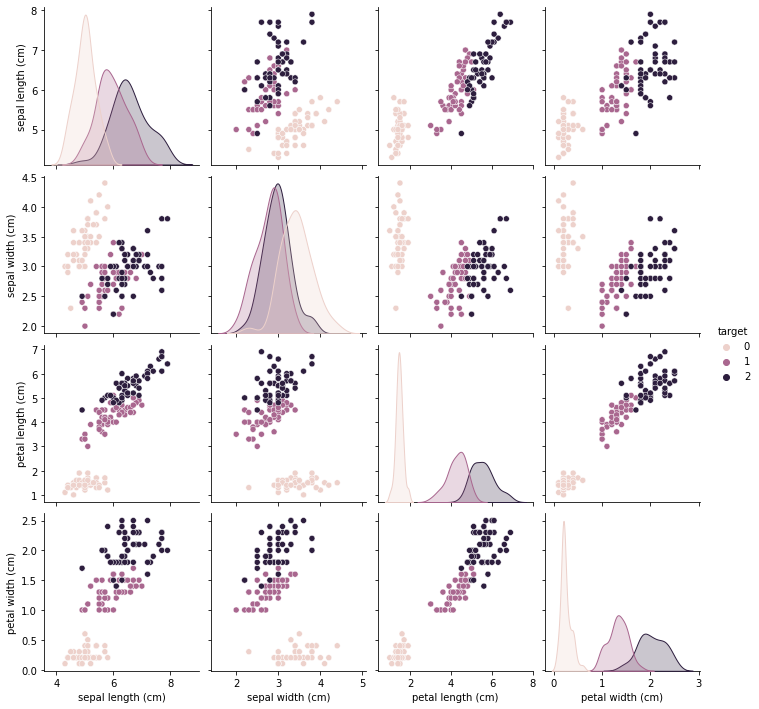

In [66]:
sns.pairplot(df3, hue='target' )
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  train_size=0.7)



# 1. Regresión logistica 

In [68]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)


LogisticRegression(C=100000.0)

In [69]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
x_label = iris.feature_names[0]
y_label = iris.feature_names[1]

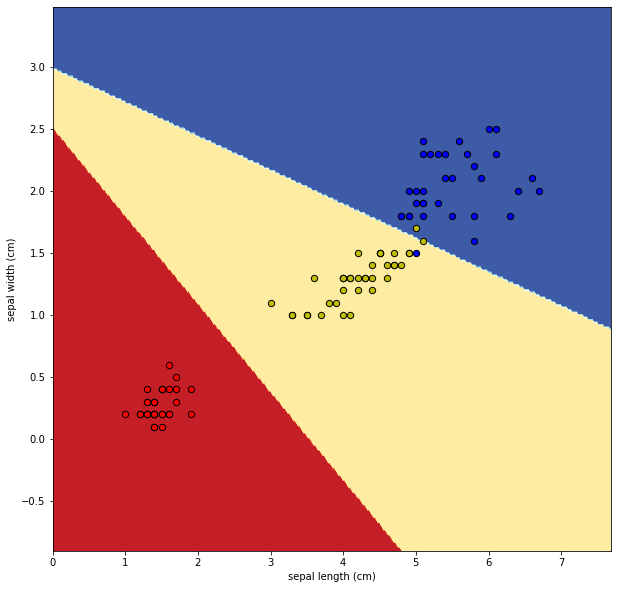

In [70]:
predict_boundary(X_train, y_train, plot_step, plot_colors, logreg, x_label, y_label)

In [71]:
y_test

array([1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1,
       2])

In [72]:
predic = logreg.predict(X_test)
predic

array([1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1,
       2])

In [73]:
predic2 = logreg.predict(X_train)
predic2

array([1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2])

In [74]:
predic == y_test
print(np.sum(predic2 == y_train))

103


In [75]:
(np.sum(predic == y_test)/len(predic))*100

91.11111111111111

In [76]:

print((np.sum(predic2 == y_train)/len(predic2))*100)


98.09523809523809


In [77]:
logreg.predict_proba([X_test[33,:]])

array([[9.99999946e-01, 5.38827968e-08, 8.01740905e-24]])

In [78]:
logreg.predict_proba([X_test[0,:]])

array([[2.10911992e-13, 9.83175915e-01, 1.68240854e-02]])

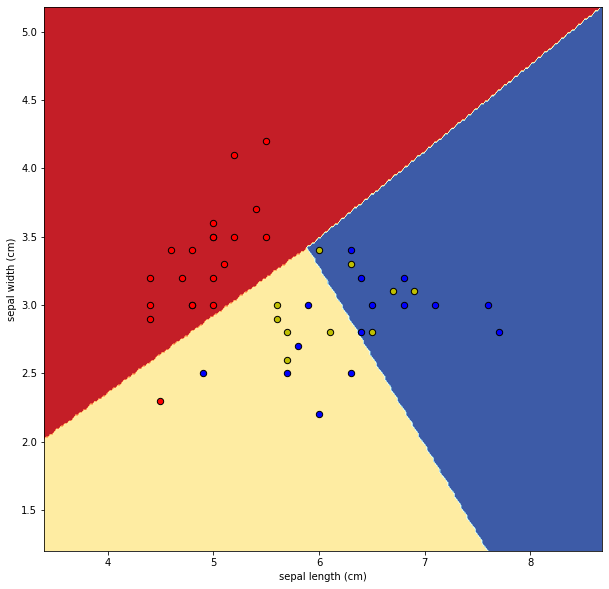

combinacion [0, 1]
la probabilidad de acierto 

73.33333333333333


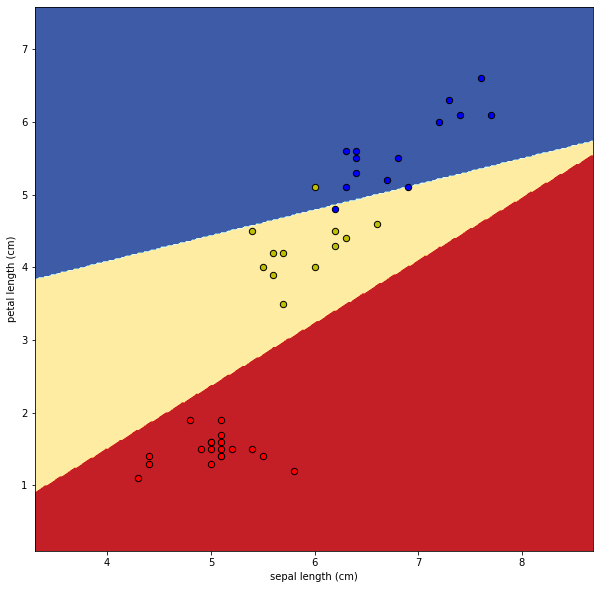

combinacion [0, 2]
la probabilidad de acierto 

93.33333333333333


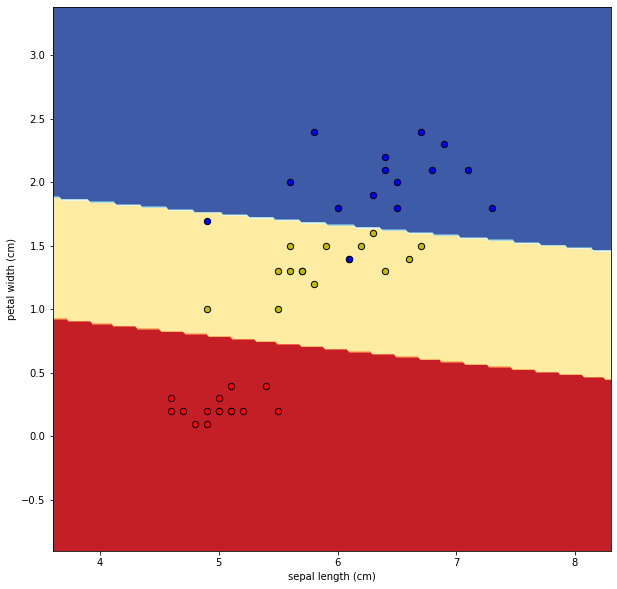

combinacion [0, 3]
la probabilidad de acierto 

95.55555555555556


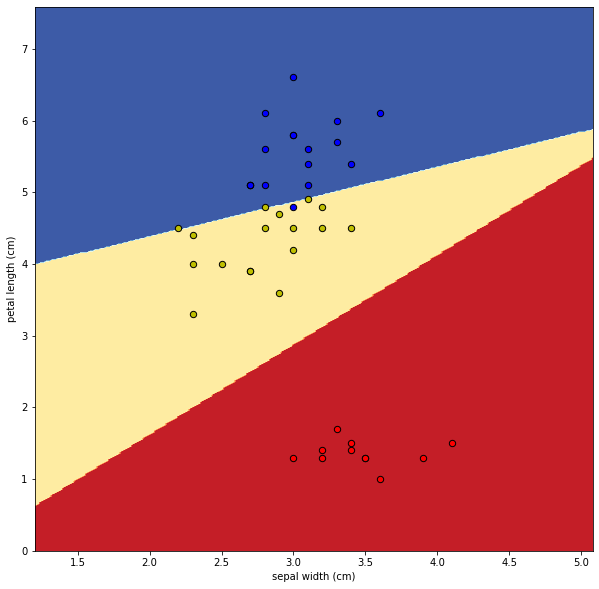

combinacion [1, 2]
la probabilidad de acierto 

91.11111111111111


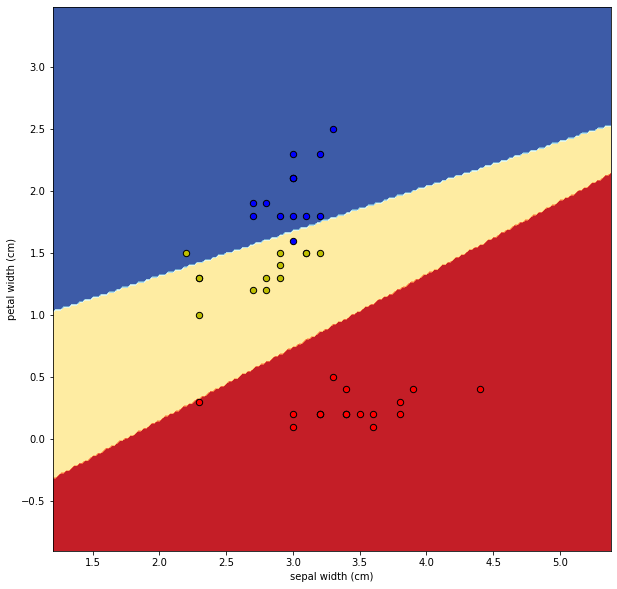

combinacion [1, 3]
la probabilidad de acierto 

95.55555555555556


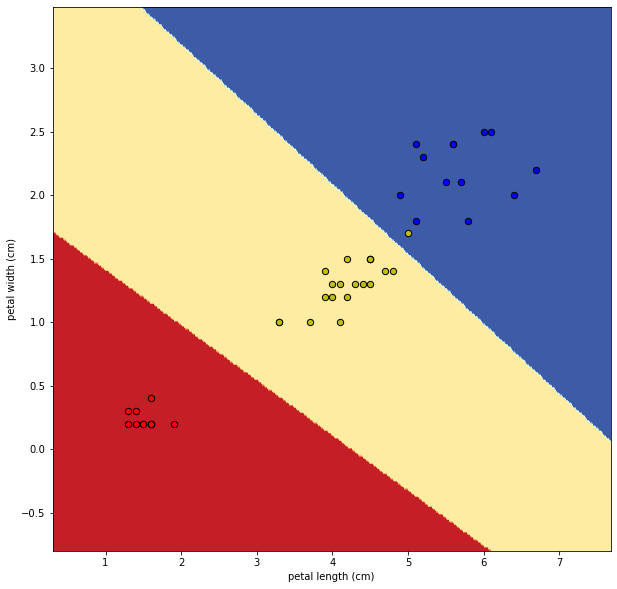

combinacion [2, 3]
la probabilidad de acierto 

97.77777777777777


In [79]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]): #combinaciones
    # extracción de combinaciones
    X = iris.data[:, pair]
    y = iris.target
    x_label = iris.feature_names[pair[0]]
    y_label = iris.feature_names[pair[1]]

    # Entrenamiento
    X_train, X_test, y_train, y_test = train_test_split(
    X, y,  train_size=0.7)

    logreg = LogisticRegression(C=1e5)
    logreg.fit(X_train, y_train)

    predict_boundary(X_test, y_test, plot_step, plot_colors, logreg, x_label, y_label)
    predic = logreg.predict(X_test)
    print('combinacion',pair)
    print('la probabilidad de acierto \n')
    print((np.sum(predic == y_test)/len(predic))*100)

In [80]:
logreg.get_params(deep=True)

{'C': 100000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [81]:
# coef_ndarray of shape (1, n_features) or (n_classes, n_features)
logreg.coef_

array([[ -6.85394724, -14.81848258],
       [  0.44177487,   1.9806715 ],
       [  6.41217237,  12.83781108]])

# Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
predic = NB.predict(X_test)
print('combinacion',pair)
print('la probabilidad de acierto \n')
print((np.sum(predic == y_test)/len(predic))*100)

combinacion [2, 3]
la probabilidad de acierto 

97.77777777777777


In [83]:
NB = GaussianNB()

In [84]:
NB.fit(X_train, y_train)

GaussianNB()

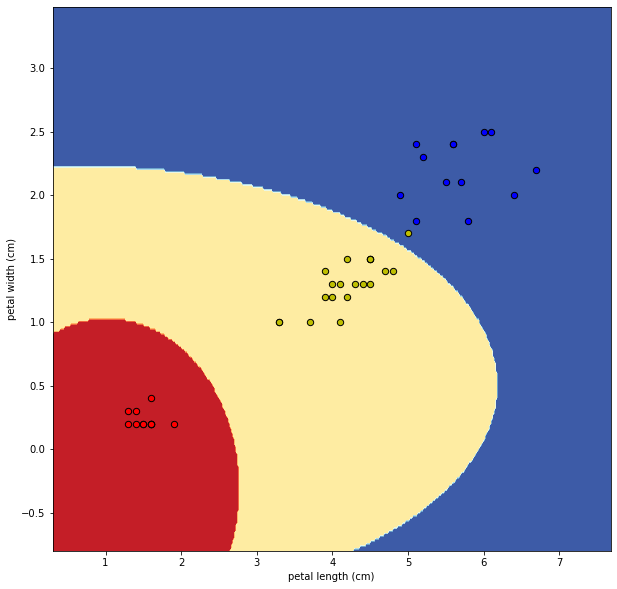

combinacion [2, 3]
la probabilidad de acierto 

97.77777777777777


In [85]:
predict_boundary(X_test, y_test, plot_step, plot_colors, NB, x_label, y_label)
predic = NB.predict(X_test)
print('combinacion',pair)
print('la probabilidad de acierto \n')
print((np.sum(predic == y_test)/len(predic))*100)

In [86]:
NB.get_params(deep=True)

{'priors': None, 'var_smoothing': 1e-09}

In [87]:
NB.predict_proba([X_test[0,:]])

array([[1.35612044e-180, 8.71162576e-004, 9.99128837e-001]])

In [88]:
NB.class_count_

array([38., 30., 37.])

In [89]:
NB.class_prior_

array([0.36190476, 0.28571429, 0.35238095])

In [90]:
#varianza de cada caracteristica por clase
#NB.var_

AttributeError: 'GaussianNB' object has no attribute 'var_'

In [91]:
# media de cada caracteristica por clase
NB.theta_

array([[1.44210526, 0.25      ],
       [4.30333333, 1.34333333],
       [5.51081081, 1.96756757]])

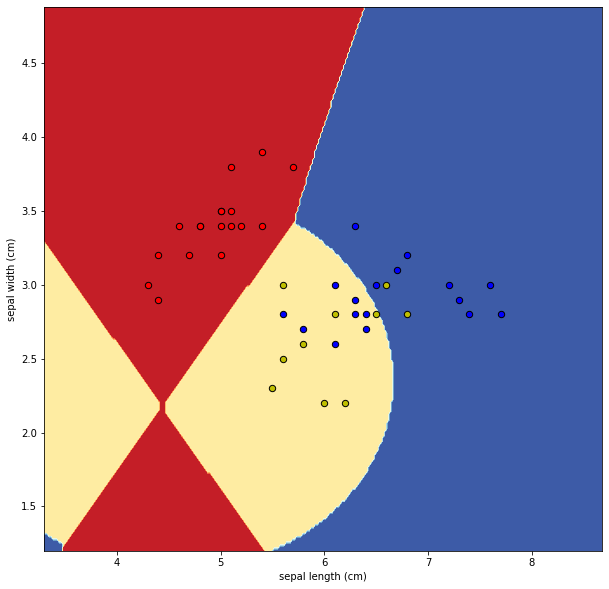

combinacion [0, 1]
la probabilidad de acierto 

77.77777777777779


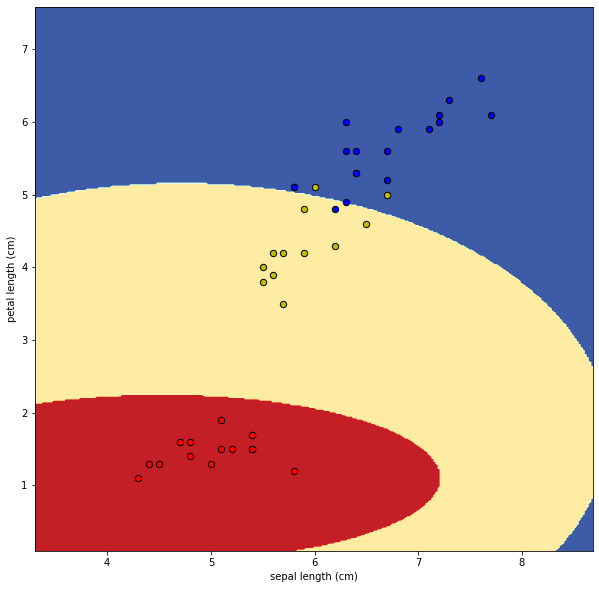

combinacion [0, 2]
la probabilidad de acierto 

91.11111111111111


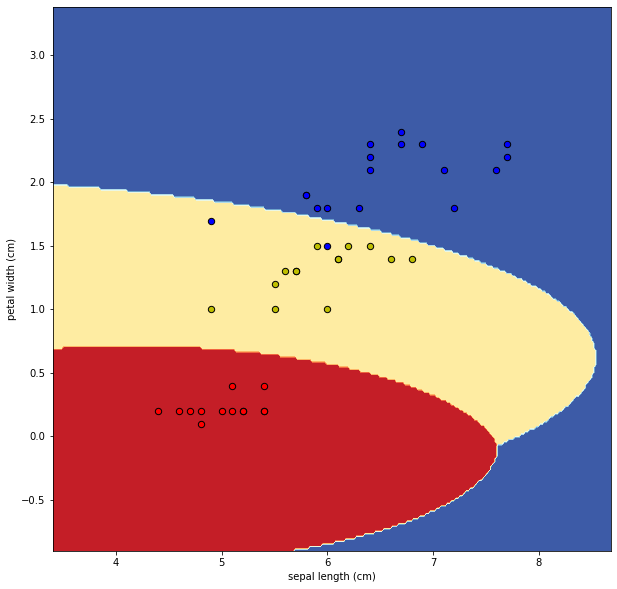

combinacion [0, 3]
la probabilidad de acierto 

95.55555555555556


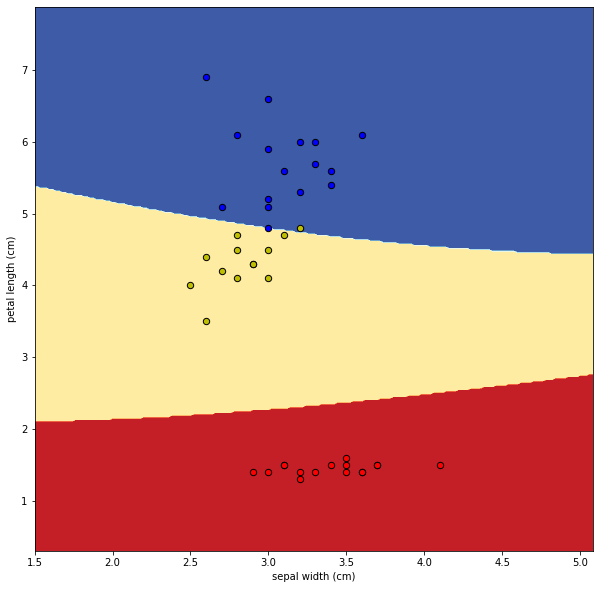

combinacion [1, 2]
la probabilidad de acierto 

95.55555555555556


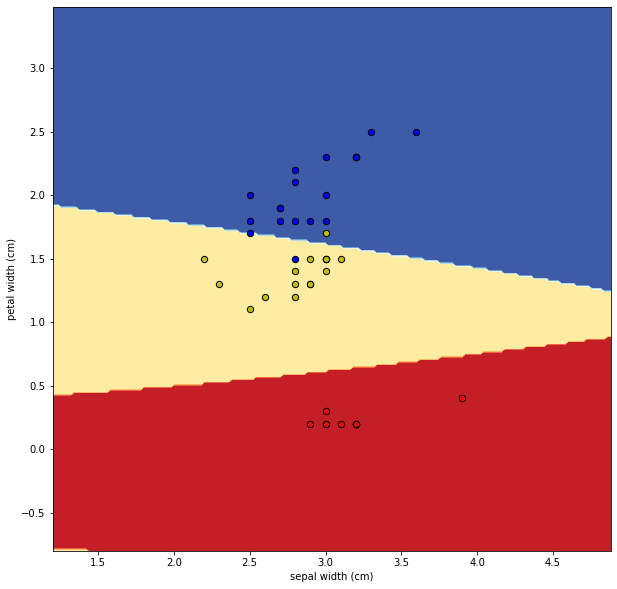

combinacion [1, 3]
la probabilidad de acierto 

93.33333333333333


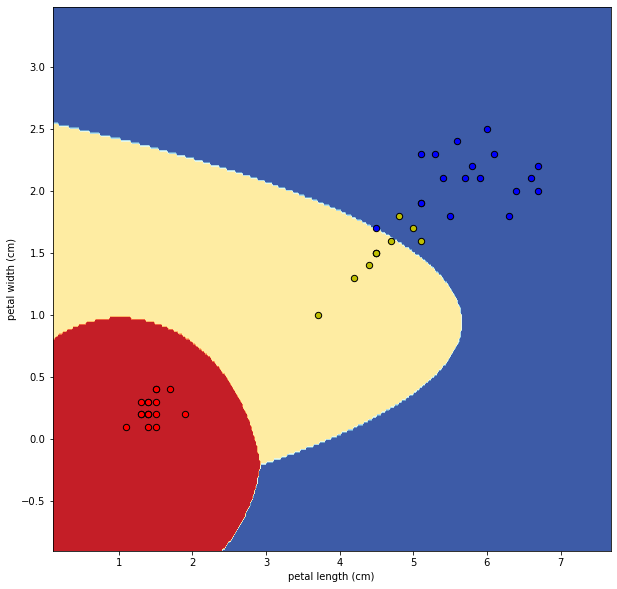

combinacion [2, 3]
la probabilidad de acierto 

91.11111111111111


In [92]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]): #combinaciones
    # extracción de combinaciones
    X = iris.data[:, pair]
    y = iris.target
    x_label = iris.feature_names[pair[0]]
    y_label = iris.feature_names[pair[1]]
    X_train, X_test, y_train, y_test = train_test_split(
    X, y,  train_size=0.7)

    # Entrenamiento
    NB = GaussianNB()
    NB.fit(X_train, y_train)

    predict_boundary(X_test, y_test, plot_step, plot_colors, NB, x_label, y_label)
    predic = NB.predict(X_test)
    print('combinacion',pair)
    print('la probabilidad de acierto \n')
    print((np.sum(predic == y_test)/len(predic))*100)

# Arbol de desición

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)

DecisionTreeClassifier()

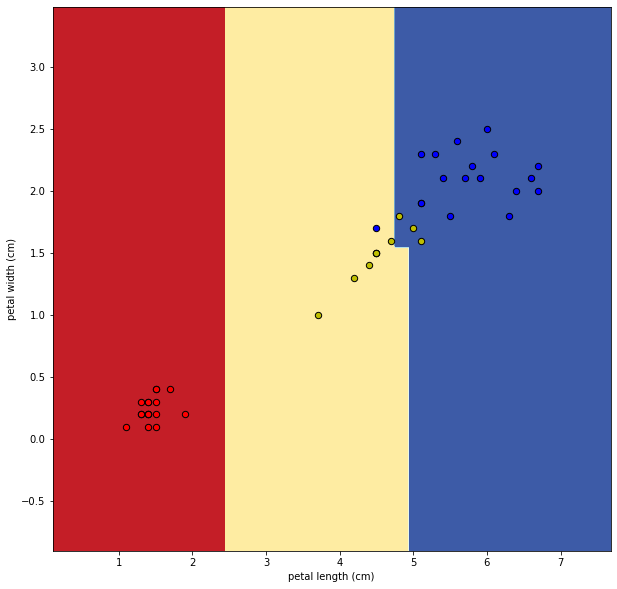

combinacion [2, 3]
la probabilidad de acierto 

91.11111111111111


In [95]:
predict_boundary(X_test, y_test, plot_step, plot_colors, Tree, x_label, y_label)
predic = Tree.predict(X_test)
print('combinacion',pair)
print('la probabilidad de acierto \n')
print((np.sum(predic == y_test)/len(predic))*100)

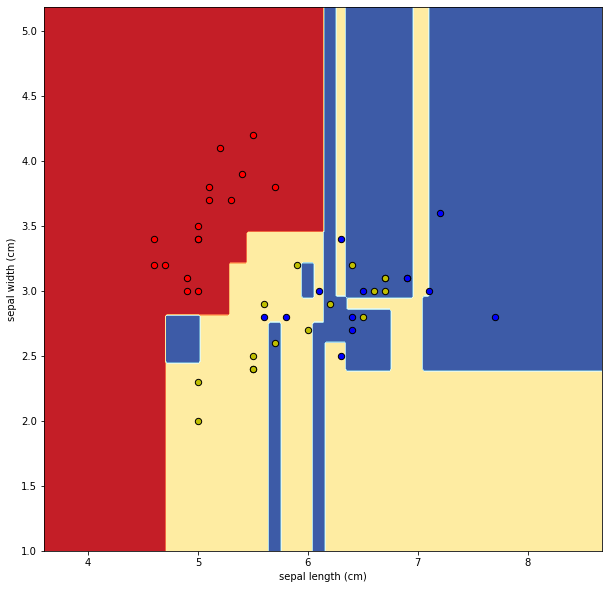

combinacion [0, 1]
la probabilidad de acierto 

0.0


C:\Users\daalu\AppData\Local\Temp\ipykernel_7532\3874708471.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((np.sum(predic == y_test)/len(predic))*100)


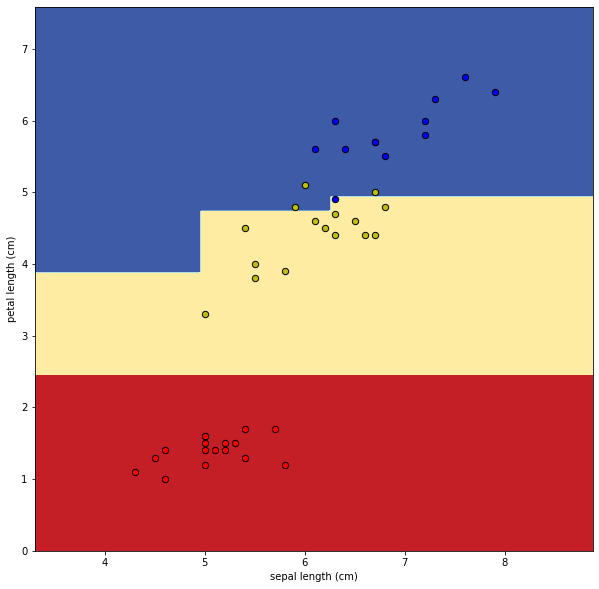

combinacion [0, 2]
la probabilidad de acierto 

0.0


C:\Users\daalu\AppData\Local\Temp\ipykernel_7532\3874708471.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((np.sum(predic == y_test)/len(predic))*100)


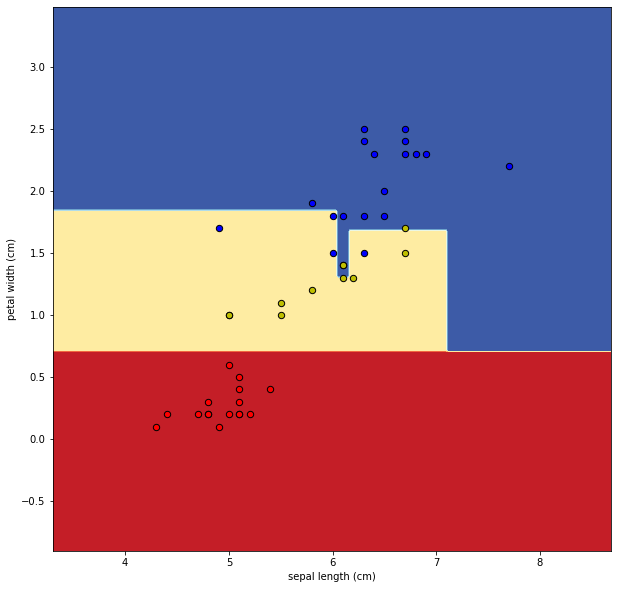

C:\Users\daalu\AppData\Local\Temp\ipykernel_7532\3874708471.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((np.sum(predic == y_test)/len(predic))*100)


combinacion [0, 3]
la probabilidad de acierto 

0.0


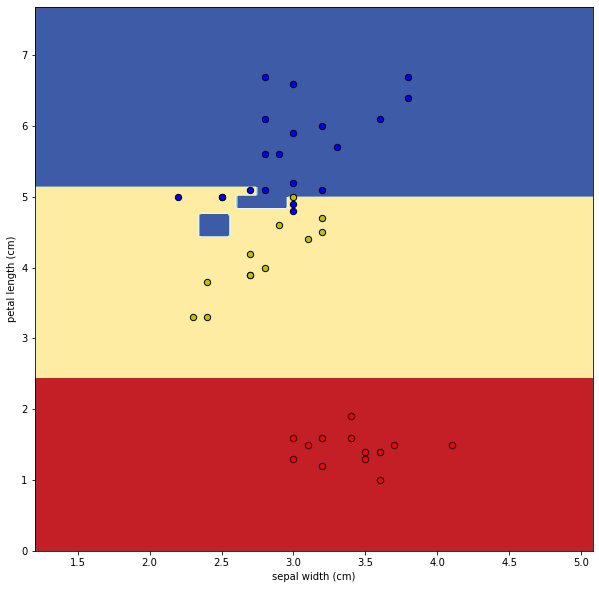

C:\Users\daalu\AppData\Local\Temp\ipykernel_7532\3874708471.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((np.sum(predic == y_test)/len(predic))*100)


combinacion [1, 2]
la probabilidad de acierto 

0.0


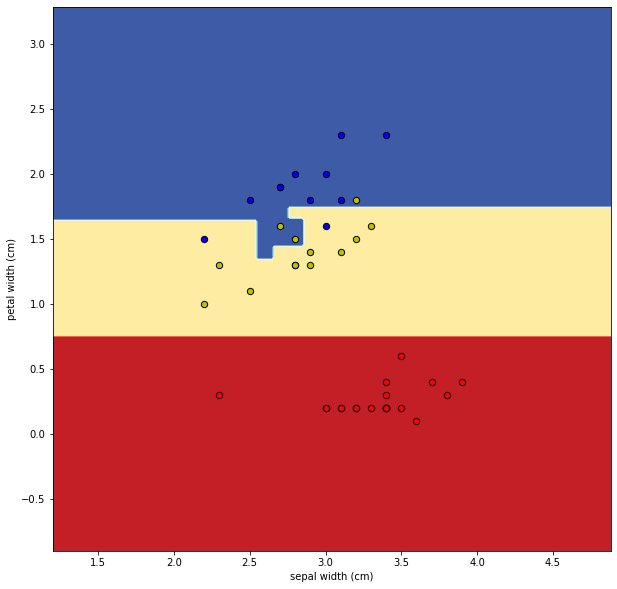

C:\Users\daalu\AppData\Local\Temp\ipykernel_7532\3874708471.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((np.sum(predic == y_test)/len(predic))*100)


combinacion [1, 3]
la probabilidad de acierto 

0.0


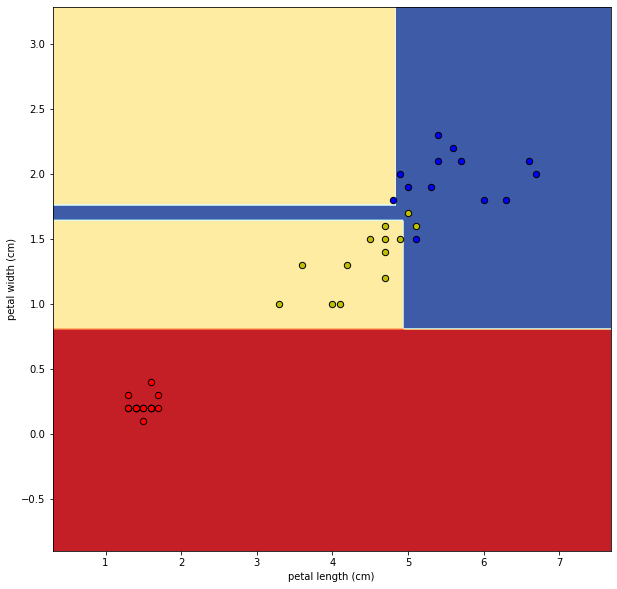

combinacion [2, 3]
la probabilidad de acierto 

0.0


C:\Users\daalu\AppData\Local\Temp\ipykernel_7532\3874708471.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((np.sum(predic == y_test)/len(predic))*100)


In [96]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]): #combinaciones
    # extracción de combinaciones
    X = iris.data[:, pair]
    y = iris.target
    x_label = iris.feature_names[pair[0]]
    y_label = iris.feature_names[pair[1]]

    X_train, X_test, y_train, y_test = train_test_split(
    X, y,  train_size=0.7)
    # Entrenamiento
    Tree = DecisionTreeClassifier()
    Tree.fit(X_train, y_train)
    


    predict_boundary(X_test, y_test, plot_step, plot_colors, Tree, x_label, y_label)
    predic = Tree.predict(X)
    print('combinacion',pair)
    print('la probabilidad de acierto \n')
    print((np.sum(predic == y_test)/len(predic))*100)

In [97]:
from sklearn.tree import export_text

In [98]:
iris['feature_names'][pair[0]]

'petal length (cm)'

In [99]:
 r = export_text(Tree, feature_names=[iris['feature_names'][pair[0]],iris['feature_names'][pair[1]]])
 print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.85
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- petal width (cm) <= 1.75
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.75
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.85
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2



# SVM

In [100]:
from sklearn.svm import SVC

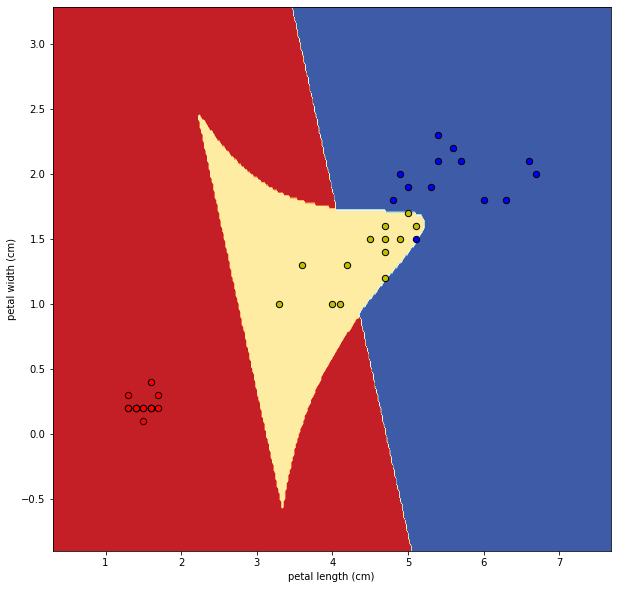

combinacion [2, 3]
la probabilidad de acierto 

97.77777777777777


In [101]:
SVM = SVC(degree=8, kernel="poly")
SVM.fit(X_train,y_train)

predict_boundary(X_test, y_test, plot_step, plot_colors, SVM, x_label, y_label)
predic = SVM.predict(X_test)
print('combinacion',pair)
print('la probabilidad de acierto \n')
print((np.sum(predic == y_test)/len(predic))*100)

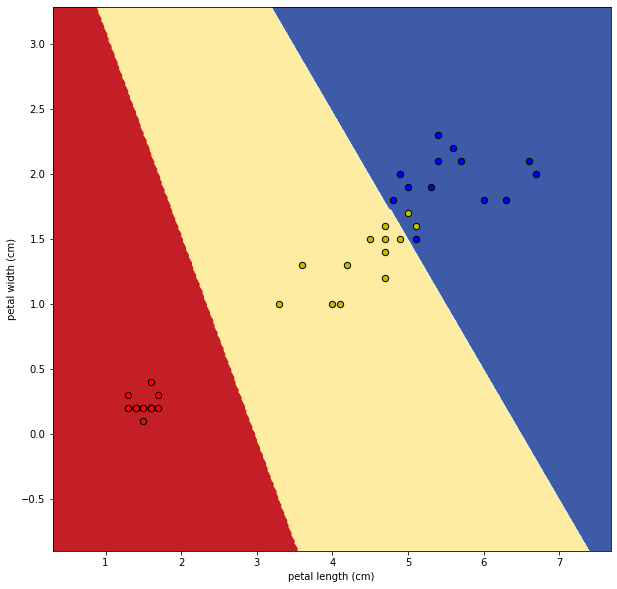

combinacion [2, 3]
la probabilidad de acierto 

95.55555555555556


In [102]:
SVM = SVC(kernel="linear")
SVM.fit(X_train,y_train)

predict_boundary(X_test, y_test, plot_step, plot_colors, SVM, x_label, y_label)
predic = SVM.predict(X_test)
print('combinacion',pair)
print('la probabilidad de acierto \n')
print((np.sum(predic == y_test)/len(predic))*100)

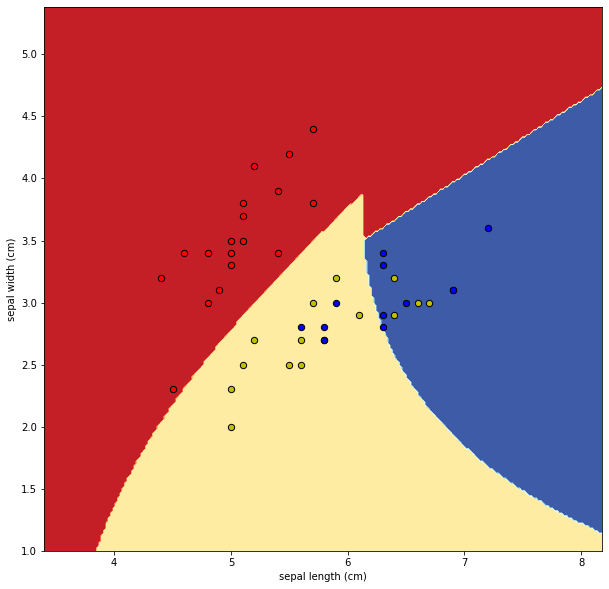

combinacion [0, 1]
la probabilidad de acierto 

77.77777777777779


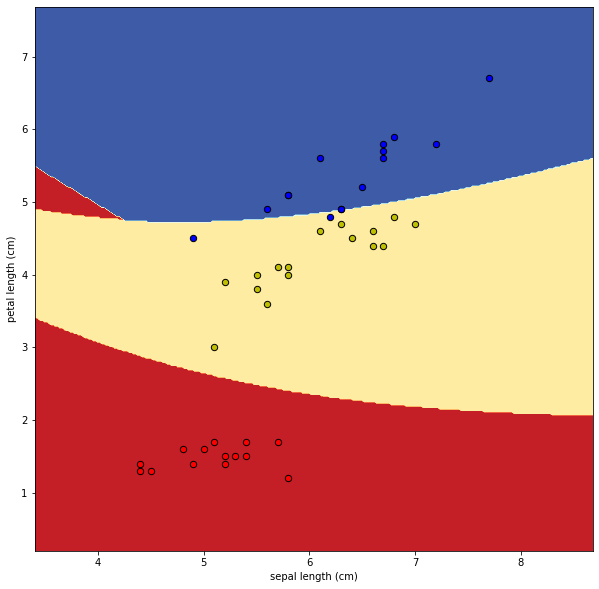

combinacion [0, 2]
la probabilidad de acierto 

93.33333333333333


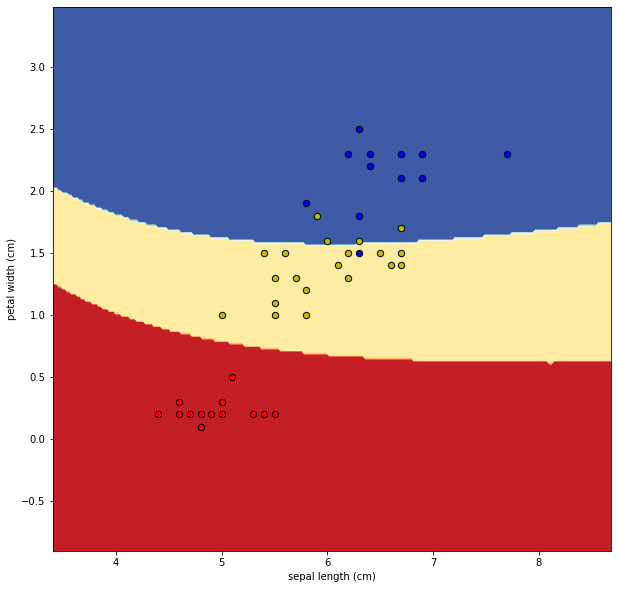

combinacion [0, 3]
la probabilidad de acierto 

88.88888888888889


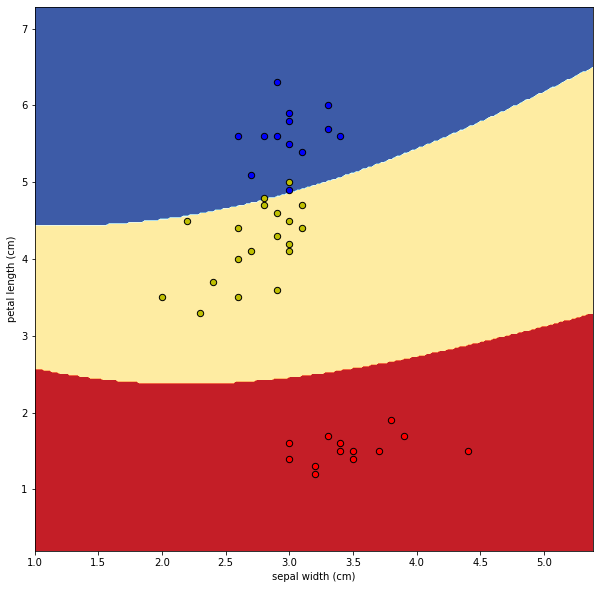

combinacion [1, 2]
la probabilidad de acierto 

95.55555555555556


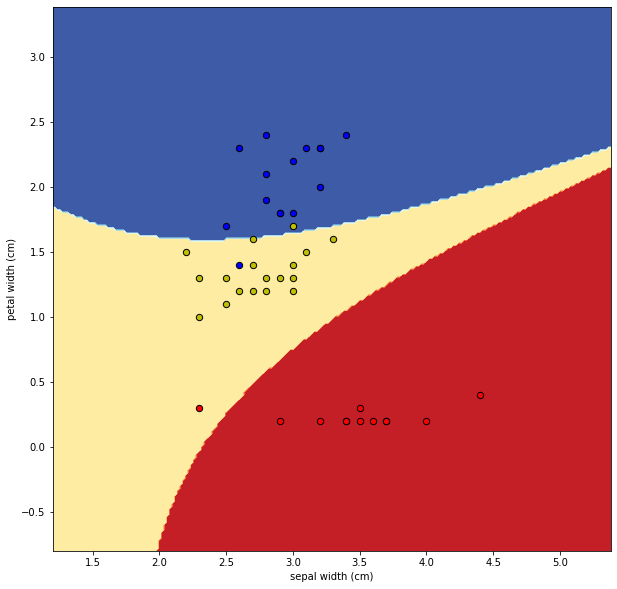

combinacion [1, 3]
la probabilidad de acierto 

93.33333333333333


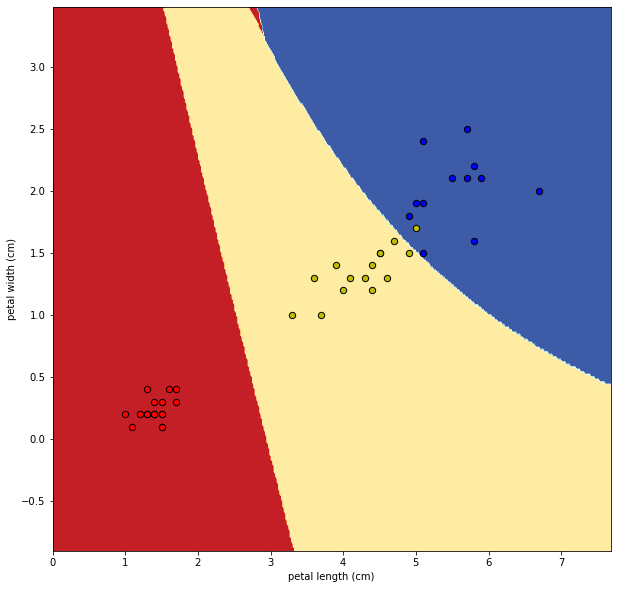

combinacion [2, 3]
la probabilidad de acierto 

97.77777777777777


In [103]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]): #combinaciones
    # extracción de combinaciones
    X = iris.data[:, pair]
    y = iris.target
    x_label = iris.feature_names[pair[0]]
    y_label = iris.feature_names[pair[1]]
    X_train, X_test, y_train, y_test = train_test_split(
    X, y,  train_size=0.7)
    # Entrenamiento
    SVM = SVC(degree=3, kernel="poly")
    SVM.fit(X_train,y_train)

    predict_boundary(X_test, y_test, plot_step, plot_colors, SVM, x_label, y_label)
    predic = SVM.predict(X_test)
    print('combinacion',pair)
    print('la probabilidad de acierto \n')
    print((np.sum(predic == y_test)/len(predic))*100)

# selección de caracteristicas

https://scikit-learn.org/stable/modules/feature_selection.html


In [104]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# prueba chi-cuadrada compara modelo con observaciones, datos aleatrios, mutuamente exclusivos

In [105]:
iris = datasets.load_iris()
X = iris.data  
Y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  train_size=0.7)

In [106]:
X_new = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)

In [107]:
X_new[0,:]

array([1.6, 0.6])

In [108]:
iris.feature_names[2:4]

['petal length (cm)', 'petal width (cm)']

In [109]:
X_train[0,:]

array([5. , 3.5, 1.6, 0.6])

In [110]:
best =  SelectKBest(chi2, k=2).fit(X_train,y_train)
best.get_feature_names_out(input_features=iris.feature_names[2:4])

AttributeError: 'SelectKBest' object has no attribute 'get_feature_names_out'

In [ ]:
iris.feature_names

# 1 cambiar eñ comnjunt de dadtos 
3 arbes cambiar parametros 
2 cambair en NB 

nb_class prior # probabildd de apracion de cada clase  50% por tods lod datos 
revisar que cual es el nb clas spripo